# Working with Raster Data Using Rasterio

## Introduction

### What is Raster Data?

### Why Use Rasterio?

## Learning Objectives

## Installing Rasterio

In [1]:
# %pip install rasterio pygis

In [2]:
import rasterio
import rasterio.plot
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

## Reading Raster Data

### Opening Raster Files

In [3]:
raster_path = (
    "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"
)
src = rasterio.open(raster_path)
print(src)

<open DatasetReader name='https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif' mode='r'>


### Understanding Raster Metadata

#### Basic File Information

In [4]:
print(f"File name: {src.name}")
print(f"File mode: {src.mode}")

File name: https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif
File mode: r


In [5]:
print("Raster metadata:")
for key, value in src.meta.items():
    print(f"{key}: {value}")

Raster metadata:
driver: GTiff
dtype: int16
nodata: None
width: 4269
height: 3113
count: 1
crs: EPSG:3857
transform: | 90.00, 0.00,-13442488.34|
| 0.00,-90.00, 4668371.58|
| 0.00, 0.00, 1.00|


#### Spatial Properties

In [6]:
print(f"Coordinate Reference System: {src.crs}")

Coordinate Reference System: EPSG:3857


In [7]:
print(f"Pixel size (x, y): {src.res}")

Pixel size (x, y): (90.0, 89.99579177642138)


In [8]:
print(f"Raster dimensions: {src.width} x {src.height} pixels")

Raster dimensions: 4269 x 3113 pixels


In [9]:
print(f"Geographic bounds: {src.bounds}")

Geographic bounds: BoundingBox(left=-13442488.3428, bottom=4388214.6777, right=-13058278.3428, top=4668371.5775)


#### Data Properties

In [10]:
print(f"Data types: {src.dtypes}")

Data types: ('int16',)


In [11]:
print(f"Number of bands: {src.count}")

Number of bands: 1


### The Affine Transform

In [12]:
print("Affine transform:")
print(src.transform)

Affine transform:
| 90.00, 0.00,-13442488.34|
| 0.00,-90.00, 4668371.58|
| 0.00, 0.00, 1.00|


## Visualizing Raster Data

### Basic Raster Visualization

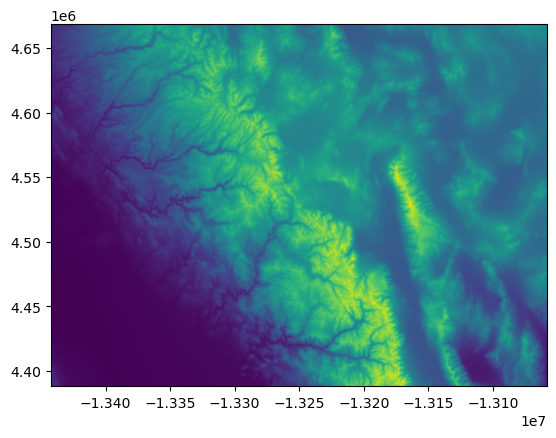

<Axes: >

In [13]:
rasterio.plot.show(src)

### Understanding Color Maps

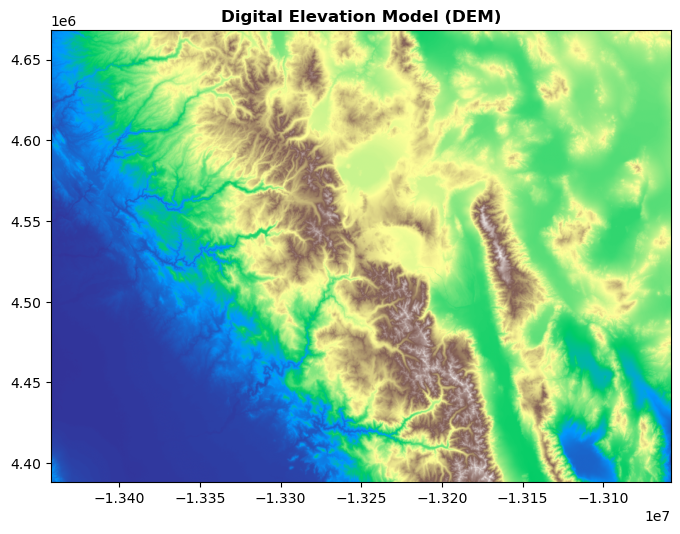

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src, cmap="terrain", ax=ax, title="Digital Elevation Model (DEM)")
plt.show()

### Adding Colorbars

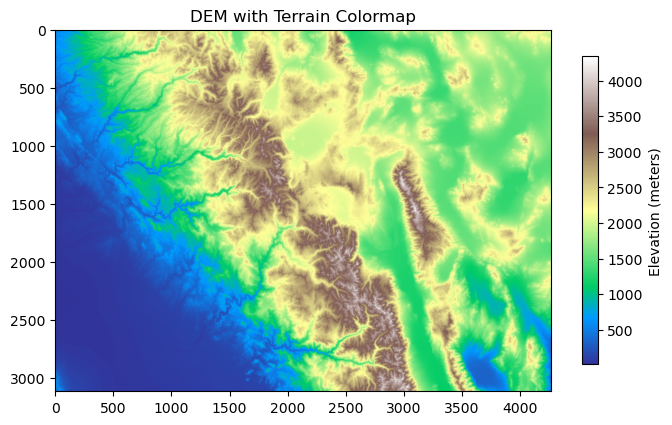

In [15]:
elev_band = src.read(1)
plt.figure(figsize=(8, 8))
plt.imshow(elev_band, cmap="terrain")
plt.colorbar(label="Elevation (meters)", shrink=0.5)
plt.title("DEM with Terrain Colormap")
plt.show()

### Visualizing Multiple Bands

In [16]:
raster_path = "https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif"
src = rasterio.open(raster_path)

#### Single Band Visualization

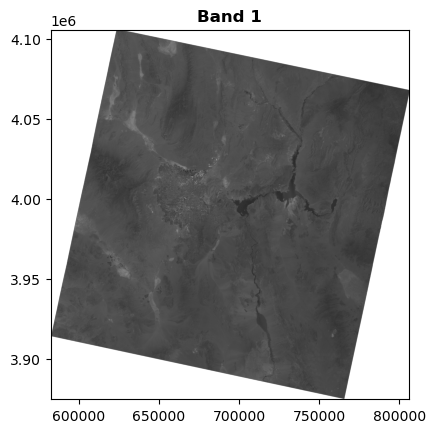

<Axes: title={'center': 'Band 1'}>

In [17]:
rasterio.plot.show((src, 1), cmap="gray", title="Band 1")

#### RGB Composite

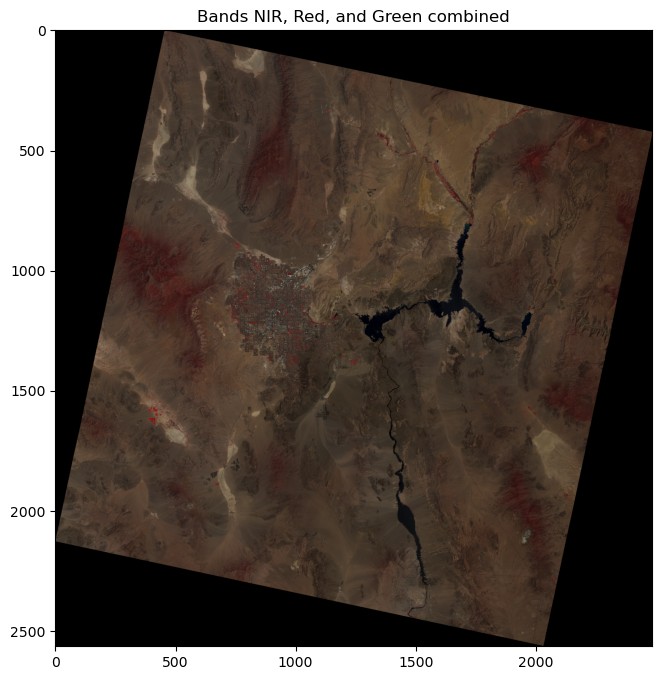

In [18]:
nir_band = src.read(5)
red_band = src.read(4)
green_band = src.read(3)

# Stack the bands into a single array
rgb = np.dstack((nir_band, red_band, green_band)).clip(0, 1)

# Plot the stacked array
plt.figure(figsize=(8, 8))
plt.imshow(rgb)
plt.title("Bands NIR, Red, and Green combined")
plt.show()

#### Creating a Multi-Panel Plot

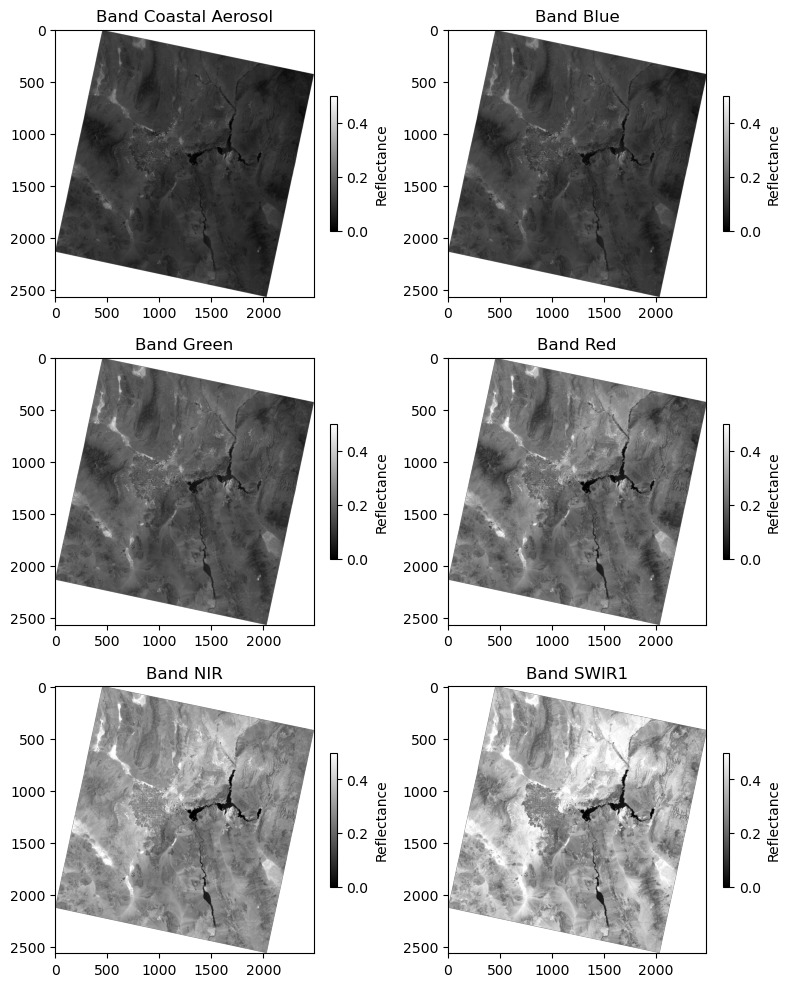

In [19]:
band_names = ["Coastal Aerosol", "Blue", "Green", "Red", "NIR", "SWIR1", "SWIR2"]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration

for band in range(1, src.count):
    data = src.read(band)
    ax = axes[band - 1]
    im = ax.imshow(data, cmap="gray", vmin=0, vmax=0.5)
    ax.set_title(f"Band {band_names[band - 1]}")
    fig.colorbar(im, ax=ax, label="Reflectance", shrink=0.5)

plt.tight_layout()
plt.show()

### Overlaying Vector Data

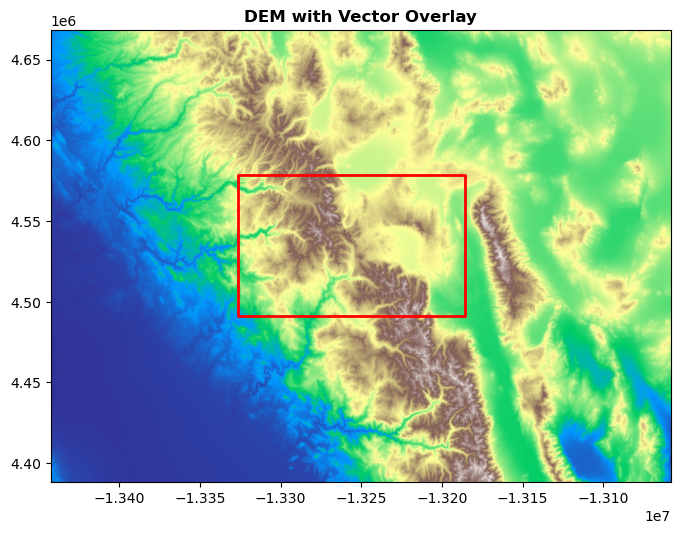

In [20]:
# Load raster data
raster_path = (
    "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"
)
src = rasterio.open(raster_path)

# Load vector data
vector_path = (
    "https://github.com/opengeos/datasets/releases/download/places/dem_bounds.geojson"
)
gdf = gpd.read_file(vector_path)
gdf = gdf.to_crs(src.crs)  # Ensure same CRS as raster

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src, cmap="terrain", ax=ax, title="DEM with Vector Overlay")
gdf.plot(ax=ax, edgecolor="red", facecolor="none", linewidth=2)
plt.show()

## Accessing and Manipulating Raster Bands

### Stacking Multiple Bands

In [21]:
raster_path = "https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif"
src = rasterio.open(raster_path)

In [22]:
nir_band = src.read(5)
red_band = src.read(4)
green_band = src.read(3)

# Stack the bands into a single array
rgb = np.dstack((nir_band, red_band, green_band)).clip(0, 1)

print(rgb.shape)

(2563, 2485, 3)


### Basic Band Math (NDVI Calculation)

/tmp/ipykernel_783/2923760105.py:2: RuntimeWarning: invalid value encountered in subtract
  ndvi = (nir_band - red_band) / (nir_band + red_band)


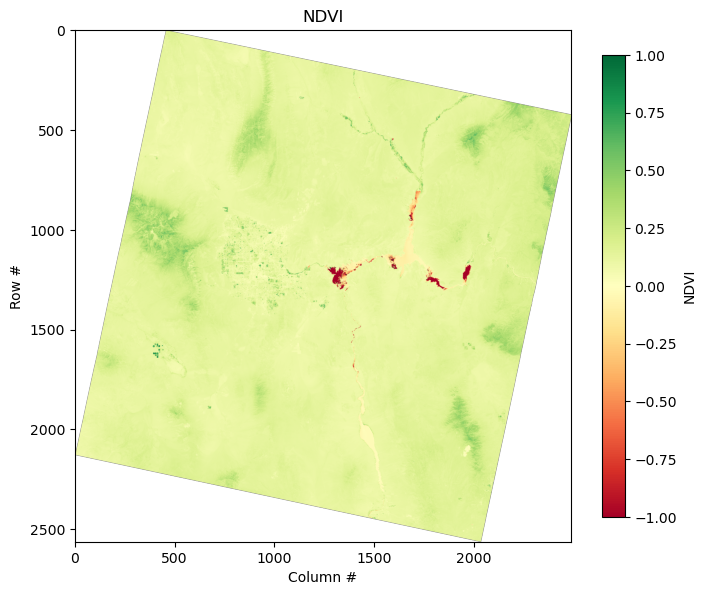

In [23]:
# NDVI Calculation: NDVI = (NIR - Red) / (NIR + Red)
ndvi = (nir_band - red_band) / (nir_band + red_band)
ndvi = ndvi.clip(-1, 1)

plt.figure(figsize=(8, 8))
plt.imshow(ndvi, cmap="RdYlGn", vmin=-1, vmax=1)
plt.colorbar(label="NDVI", shrink=0.75)
plt.title("NDVI")
plt.xlabel("Column #")
plt.ylabel("Row #")
plt.show()

## Writing Raster Data

In [24]:
with rasterio.open(raster_path) as src:
    profile = src.profile
print(profile)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -inf, 'width': 2485, 'height': 2563, 'count': 7, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'), 'transform': Affine(90.0, 0.0, 582390.0,
       0.0, -90.0, 4105620.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'pixel'}


In [25]:
profile.update(dtype=rasterio.float32, count=1, compress="lzw")
print(profile)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -inf, 'width': 2485, 'height': 2563, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'), 'transform': Affine(90.0, 0.0, 582390.0,
       0.0, -90.0, 4105620.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}


In [26]:
output_raster_path = "ndvi.tif"

with rasterio.open(output_raster_path, "w", **profile) as dst:
    dst.write(ndvi, 1)
print(f"Raster data has been written to {output_raster_path}")

Raster data has been written to ndvi.tif


## Clipping Raster Data

### Clipping with a Bounding Box

In [27]:
raster_path = "https://github.com/opengeos/datasets/releases/download/raster/LC09_039035_20240708_90m.tif"
src = rasterio.open(raster_path)
data = src.read()

In [28]:
data.shape

(7, 2563, 2485)

In [29]:
subset = data[:, 900:1400, 700:1200].clip(0, 1)
rgb_subset = np.dstack((subset[4], subset[3], subset[2]))
rgb_subset.shape

(500, 500, 3)

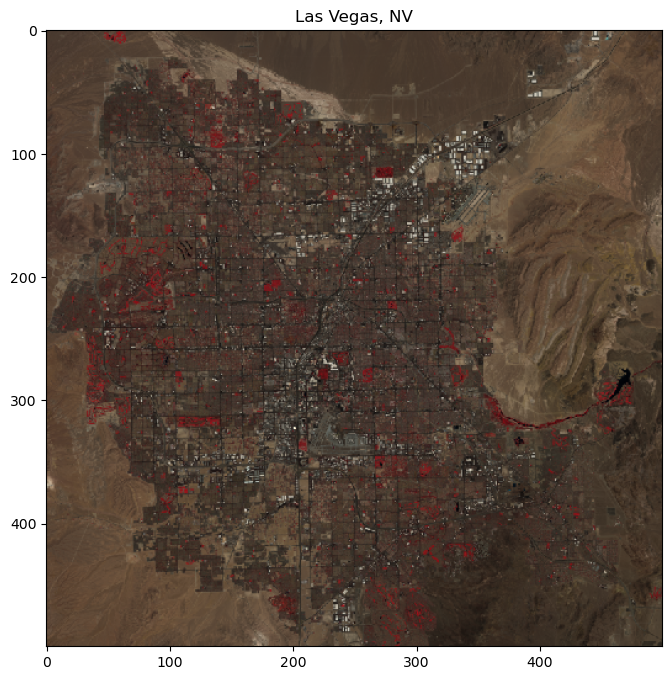

In [30]:
# Plot the stacked array
plt.figure(figsize=(8, 8))
plt.imshow(rgb_subset)
plt.title("Las Vegas, NV")
plt.show()

In [31]:
from rasterio.windows import Window
from rasterio.transform import from_bounds

# Assuming subset and src are already defined
# Define the window of the subset (replace with actual window coordinates)
window = Window(col_off=700, row_off=900, width=500, height=500)

# Calculate the bounds of the window
window_bounds = rasterio.windows.bounds(window, src.transform)

# Calculate the new transform based on the window bounds
new_transform = from_bounds(*window_bounds, window.width, window.height)

In [32]:
with rasterio.open(
    "las_vegas.tif",
    "w",
    driver="GTiff",
    height=subset.shape[1],
    width=subset.shape[2],
    count=subset.shape[0],
    dtype=subset.dtype,
    crs=src.crs,
    transform=new_transform,
    compress="lzw",
) as dst:
    dst.write(subset)

### Clipping with a Vector Dataset

In [33]:
import fiona
import rasterio.mask

In [34]:
geojson_path = "https://github.com/opengeos/datasets/releases/download/places/las_vegas_bounds_utm.geojson"
bounds = gpd.read_file(geojson_path)

<Axes: >

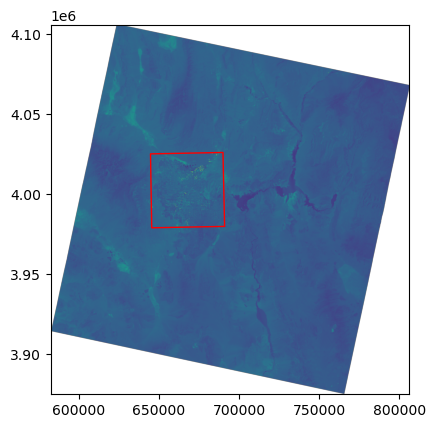

In [35]:
fig, ax = plt.subplots()
rasterio.plot.show(src, ax=ax)
bounds.plot(ax=ax, edgecolor="red", facecolor="none")

In [36]:
with fiona.open(geojson_path, "r") as f:
    shapes = [feature["geometry"] for feature in f]
out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)

In [37]:
out_meta = src.meta
out_meta.update(
    {
        "driver": "GTiff",
        "height": out_image.shape[1],
        "width": out_image.shape[2],
        "transform": out_transform,
    }
)

with rasterio.open("las_vegas_clip.tif", "w", **out_meta) as dst:
    dst.write(out_image)

## Key Takeaways

## Exercises

### Sample Datasets

### Exercise 1: Reading and Exploring Raster Data

File name: https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif
File mode: r
Coordinate Reference System: EPSG:3857
Pixel size (x, y): (90.0, 89.99579177642138)
Raster dimensions: 4269 x 3113 pixels
Data types: ('int16',)


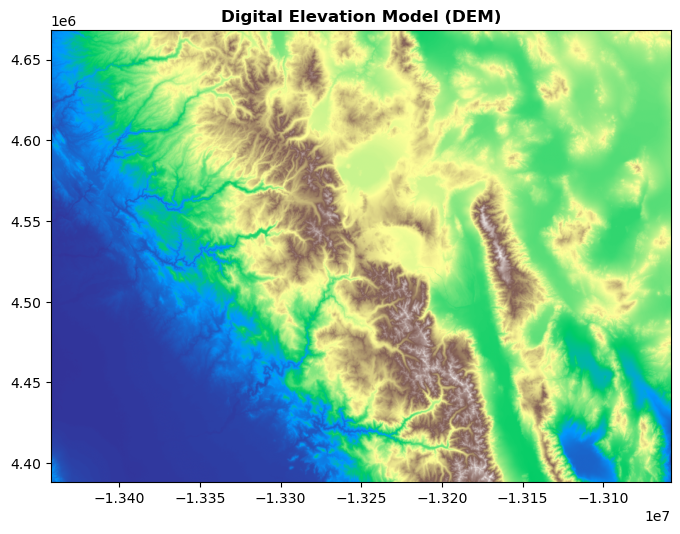

In [38]:
raster_path = ('https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif')

src = rasterio.open(raster_path)
print(f'File name: {src.name}')
print(f'File mode: {src.mode}')
print(f"Coordinate Reference System: {src.crs}")
print(f"Pixel size (x, y): {src.res}")
print(f"Raster dimensions: {src.width} x {src.height} pixels")
print(f"Data types: {src.dtypes}")

fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src, cmap="terrain", ax=ax, title="Digital Elevation Model (DEM)")
plt.show()


### Exercise 2: Working with Raster Bands

Number of bands = 4


/opt/conda/lib/python3.12/site-packages/rasterio/plot.py:77: RuntimeWarning: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
  arr = source[0].read(source[1])


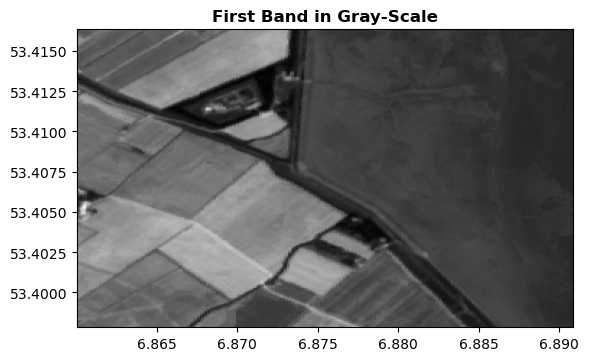

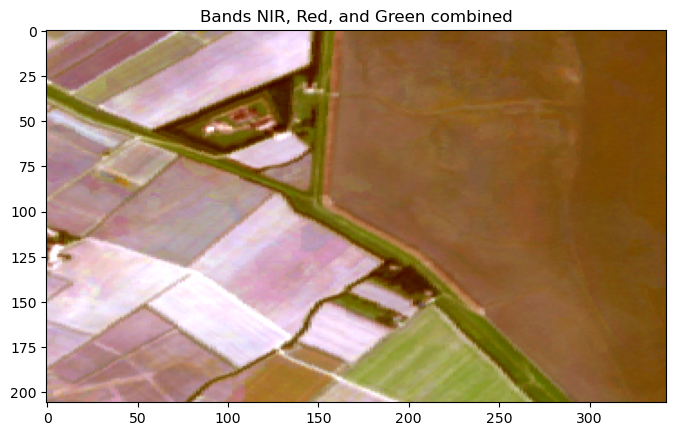

In [39]:
# Load the image
raster_path = "https://github.com/opengeos/datasets/releases/download/raster/cog.tif"
src = rasterio.open(raster_path)

# How many bands are in the image
print(f"Number of bands = {src.count}")



# Show gray band
rasterio.plot.show((src, 1), cmap='gray', title="First Band in Gray-Scale")

# Get seperate band images
nir_band = src.read(3)
red_band = src.read(2)
green_band = src.read(1)

# Stack matrix representations of color bands and clip values to true rgb values
rgb = np.dstack((nir_band, red_band, green_band))

# Normalize the data and stretch color bands to fit full color
rgb_min, rgb_max = np.percentile(rgb, (2, 98))
rgb = np.clip((rgb - rgb_min) / (rgb_max - rgb_min), 0, 1)


# Plot the stacked array
plt.figure(figsize=(8, 8))
plt.imshow(rgb)
plt.title("Bands NIR, Red, and Green combined")
plt.show()



### Exercise 3: Basic Raster Operations

Mean elevation = 1582.26
Median elevation = 1675.00
Standard deviation = 947.30
Min elevation = 15.00
Max elevation = 4338.00


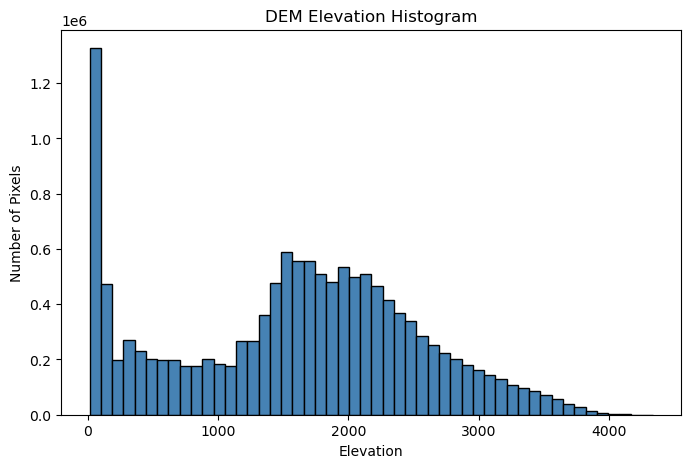

/tmp/ipykernel_783/2272777517.py:33: RuntimeWarning: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
  data = src.read(band)


Mean value = 1021.3813167550014


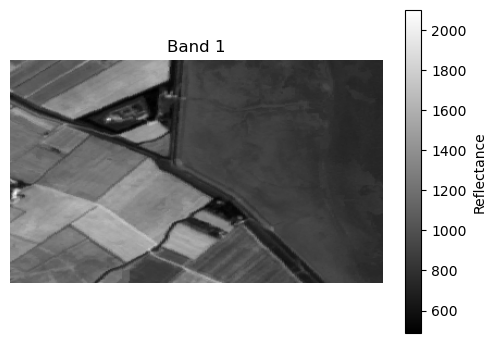

Mean value = 1131.8595286110321


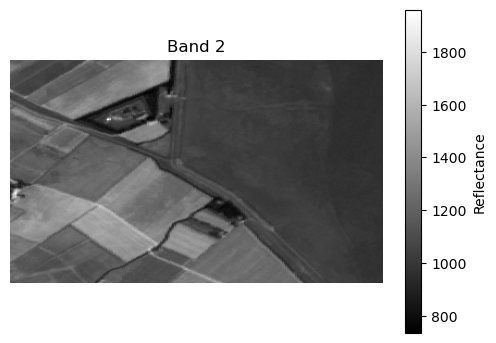

Mean value = 1247.6047509212365


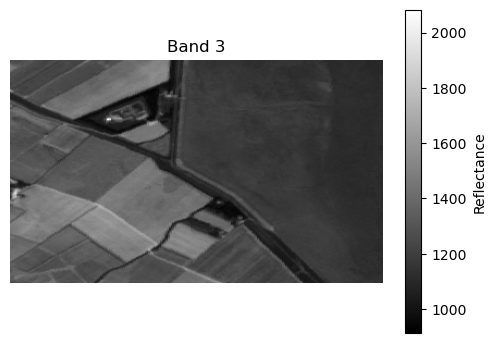

Mean value = 1672.8787328786616


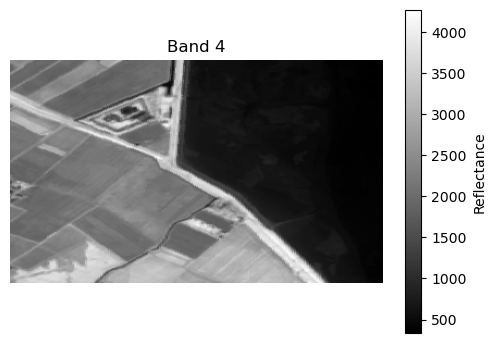

In [44]:
raster_path = ('https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif')

src_1 = rasterio.open(raster_path)
dem = src_1.read(1).astype(float)
mean = np.mean(dem)
std = np.std(dem)
print(f"Mean elevation = {np.mean(dem):.2f}")
print(f"Median elevation = {np.median(dem):.2f}")
print(f"Standard deviation = {np.std(dem):.2f}")
print(f"Min elevation = {np.min(dem):.2f}")
print(f"Max elevation = {np.max(dem):.2f}")


# Flatten the array for histogram (looked up how to do this)
dem_flat = dem.compressed() if np.ma.is_masked(dem) else dem.flatten()

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(dem_flat, bins=50, color='steelblue', edgecolor='black')
plt.title('DEM Elevation Histogram')
plt.xlabel('Elevation')
plt.ylabel('Number of Pixels')
plt.show()


raster_path = "https://github.com/opengeos/datasets/releases/download/raster/cog.tif"
src = rasterio.open(raster_path)



for band in range(1, src.count + 1):
    
    data = src.read(band)
    print(f'Mean value = {data.mean()}')

    # Create a new figure for each band
    fig, ax = plt.subplots(figsize=(6, 6))
    im = ax.imshow(data, cmap="gray")
    ax.set_title(f"Band {band}")
    fig.colorbar(im, ax=ax, label="Reflectance", shrink=0.7)
    plt.axis("off")
    plt.show()

### Exercise 4: Writing and Saving Raster Data

In [46]:
dx = src_1.transform[0]
dy = src_1.transform[4]

gy, gx = np.gradient(dem, dy, dx)

slope = np.sqrt(gx**2 + gy**2)

profile = src_1.profile.copy()
profile.update(dtype='float32', count=1)

with rasterio.open('dem_slope.tif', 'w', **profile) as dst:
    dst.write(slope.astype('float32'), 1)
    dst.update_tags(slope_method='np.gradient', description='Slope derived from DEM using gradient')



raster_path = "https://github.com/opengeos/datasets/releases/download/raster/cog.tif"
src = rasterio.open(raster_path)

band4 = src.read(4).astype('float')
band3 = src.read(3).astype('float')

ndvi = ((band4 - band3) / (band4 + band3))

profile = src.profile.copy()
profile.update(dtyle='float32', count=1)

with rasterio.open('vegitation_index.tif', 'w', **profile) as dst:
    dst.write(ndvi.astype('float32'), 1)
    dst.update_tags(vegitation_index='((band4 - band3) / (band4 + band3))', description='Simple vegitation index from bands4 and 3')




/tmp/ipykernel_783/356276882.py:20: RuntimeWarning: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
  band4 = src.read(4).astype('float')


### Exercise 5: Clipping and Subsetting

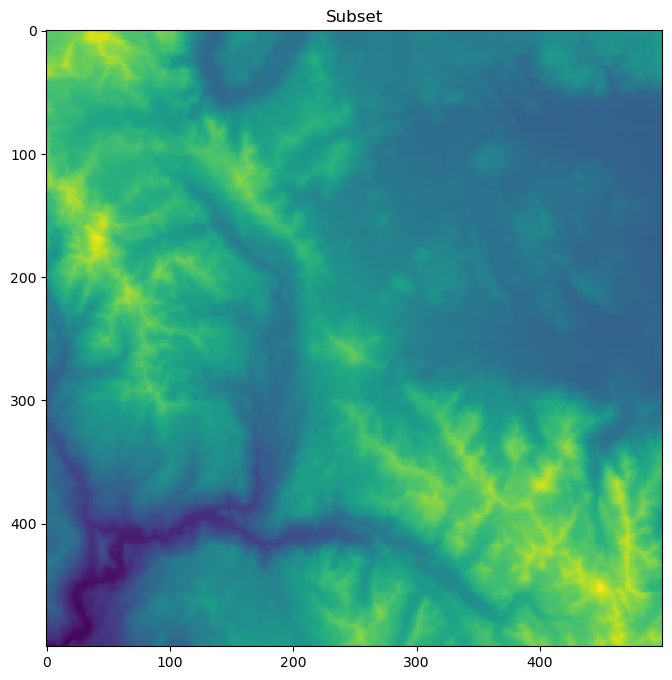

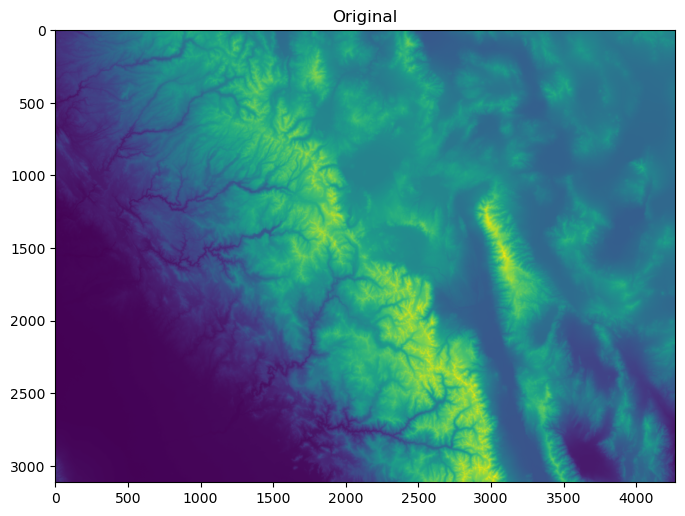

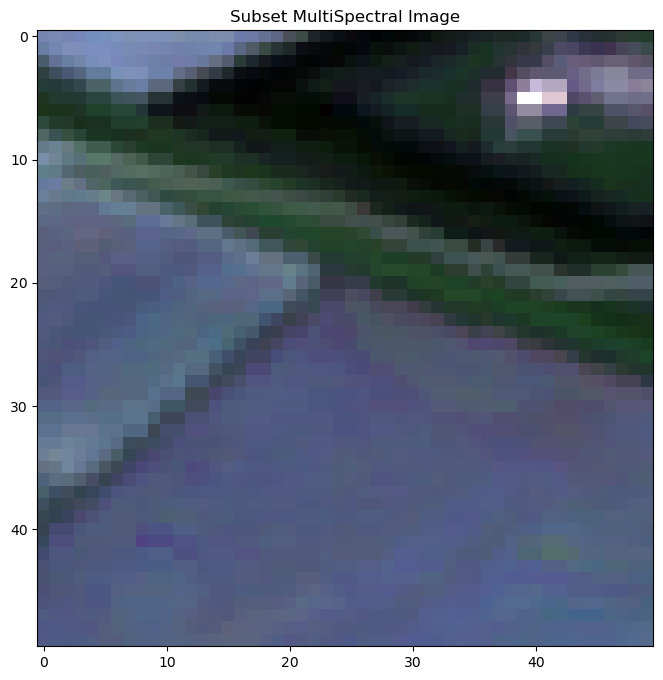

In [68]:
raster_path = ('https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif')

src_1 = rasterio.open(raster_path)
data = src_1.read(1)
x = data.shape[0]
y = data.shape[1]

subset = data[(x // 2 - 250):(x // 2 + 250), (y // 2 - 250):(y // 2 + 250)]
plt.figure(figsize=(8, 8))
plt.imshow(subset)
plt.title("Subset")
plt.show()

plt.figure(figsize=(8, 8))
plt.imshow(data)
plt.title("Original")
plt.show()

raster_path = "https://github.com/opengeos/datasets/releases/download/raster/cog.tif"
with rasterio.open(raster_path) as src:
    data = src.read()


    subset = data[:, 50:100, 50:100]
    rgb = np.stack([subset[2], subset[1], subset[0]], axis=-1)

    rgb_min = rgb.min(axis=(0, 1))
    rgb_max = rgb.max(axis=(0, 1))
    rgb_norm = (rgb - rgb_min) / (rgb_max - rgb_min + 1e-8)
    

    # Plot the stacked array
    plt.figure(figsize=(8, 8))
    plt.imshow(rgb_norm)
    plt.title("Subset MultiSpectral Image")
    plt.show()

